In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

In [26]:
max_words = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
max_length = 300
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

In [27]:
m_names = []
models = [
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        GRU(64),
        Dense(1, activation='sigmoid')
    ],name='GRU'),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        SimpleRNN(64),
        Dense(1, activation='sigmoid')
    ],name='SimpleRNN'),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ],name='LSTM')
]
for i in models:
    m_names.append(i.name)

In [28]:
batch_size = 256
epochs = 5
histories = []
for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)

Epoch 1/5
79/79 [==============================] - 133s 2s/step - loss: 0.5400 - accuracy: 0.7034 - val_loss: 0.3304 - val_accuracy: 0.8614
Epoch 2/5
79/79 [==============================] - 160s 2s/step - loss: 0.2363 - accuracy: 0.9055 - val_loss: 0.3208 - val_accuracy: 0.8694
Epoch 3/5
79/79 [==============================] - 159s 2s/step - loss: 0.1517 - accuracy: 0.9474 - val_loss: 0.3207 - val_accuracy: 0.8810
Epoch 4/5
79/79 [==============================] - 165s 2s/step - loss: 0.0956 - accuracy: 0.9699 - val_loss: 0.3658 - val_accuracy: 0.8578
Epoch 5/5
79/79 [==============================] - 171s 2s/step - loss: 0.0687 - accuracy: 0.9779 - val_loss: 0.4414 - val_accuracy: 0.8784
Epoch 1/5
79/79 [==============================] - 72s 880ms/step - loss: 0.6843 - accuracy: 0.5659 - val_loss: 0.6543 - val_accuracy: 0.6446
Epoch 2/5
79/79 [==============================] - 66s 834ms/step - loss: 0.4487 - accuracy: 0.8217 - val_loss: 0.4418 - val_accuracy: 0.8064
Epoch 3/5
79/79 

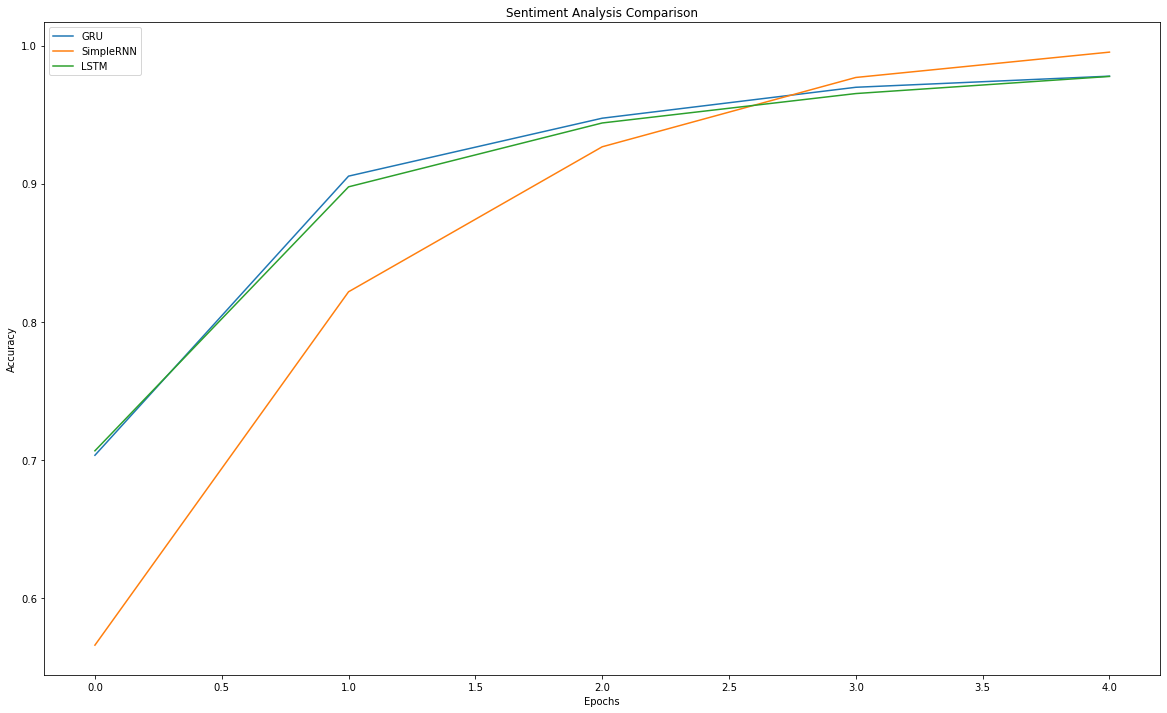

In [31]:
plt.figure(figsize=(20, 12))
i=0
for hist in histories:
    plt.plot(hist.history['accuracy'], label=m_names[i])
    i+=1
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Sentiment Analysis Comparison')
plt.legend()
plt.show()